In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train_data = train_data.drop(['Name', 'PassengerId', 'Ticket'], axis=1)
test_data = test_data.drop(['Name', 'Ticket'], axis=1)

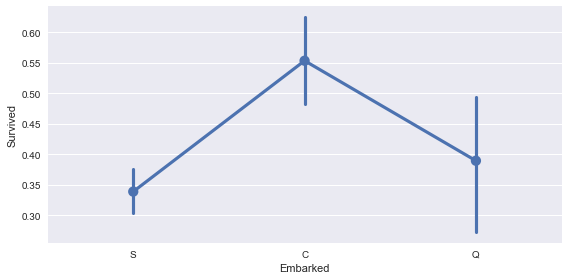

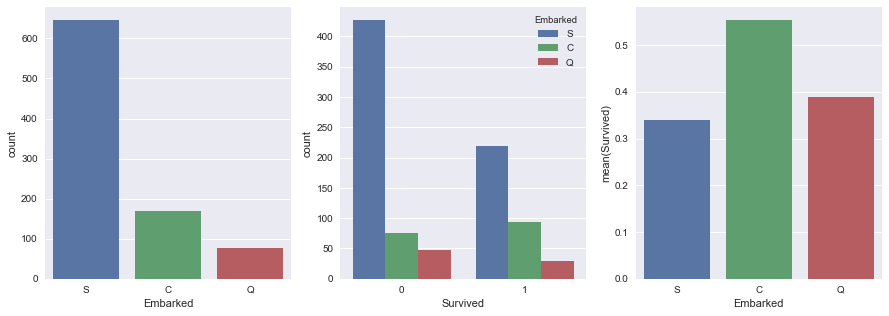

In [26]:
# Embarked

train_data.Embarked.fillna('S')
sns.factorplot('Embarked', 'Survived', data=train_data, size=4, aspect=2)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='Embarked', data=train_data, ax=axis1)
sns.countplot(x='Survived', hue='Embarked', data=train_data, ax=axis2)

embark_perc = train_data[['Embarked', 'Survived']].groupby(["Embarked"],as_index=False).mean()

sns.barplot(x='Embarked', y='Survived', data=embark_perc, order = ['S','C','Q'], ax=axis3)


embark_dummies = pd.get_dummies(train_data['Embarked'])
embark_dummies.drop(['S'], axis=1, inplace=True)

embark_test = pd.get_dummies(test_data['Embarked'])
embark_test.drop(['S'], axis=1, inplace=True)

train_data = train_data.join(embark_dummies)
test_data = test_data.join(embark_test)

train_data.drop(['Embarked'], axis=1, inplace=True)
test_data.drop(['Embarked'], axis=1, inplace=True)

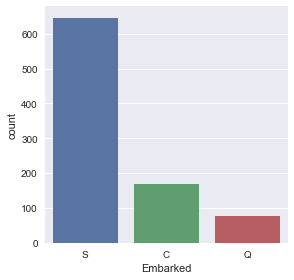

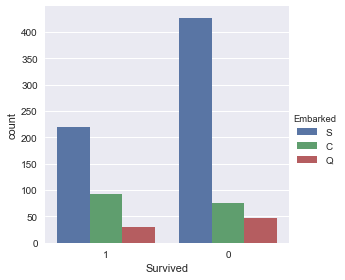

In [23]:
# Fare

test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

train_data['Fare'] = train_data['Fare'].astype(int)
test_data['Fare'] = test_data['Fare'].astype(int)

